References
- http://www.deeplearningbook.org/    

In [390]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [400]:
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures

<font size="15">Overviews</font>
1. Introduction
1. Flow
1. Underfitting
1. Overfitting
1. Regularization
1. Summary

# Introduction
- In this notebook, we want to explain **Underfitting** and **Overfitting**.
- as [this renowned book](http://www.deeplearningbook.org/contents/ml.html) says
> Underfitting: the model is not able to obtain a sufficiently low error value on the training set \
> Overfitting: the gap between the training error and test error is too large
- In other words, underfitting is not enough to be optimized on the training data, and overfitting is the model learned on the training dataset in an unexpected way. 
- I will explain the detail in its section.

# Flow
- First of all, I'm going to explain how I trained/processed the model.

## Data
- I assumed the training data is generated by the distribution based on $y=x^2$, and there's no noise in it.

- the function of the training set

In [392]:
def f_true(x):
    y = x**2
    return y

- data preparation

In [393]:
#--- parameter ---#
num = 5 # the number of the training set
test_num = 10
alpha = 0 # the amount of the noise which corrupts the data
#-----------------#

np.random.seed(42)
x = np.random.random((num, 1))*20 # generate random point in range [0, -20]
x_test = np.reshape(np.linspace(20, 25, test_num), (test_num,1)) # generate random point in range [0, -20]
y = f_true(x)
y_test = f_true(x_test)
np.random.seed(42)
y = y + np.random.randn(*x.shape)*alpha # add noise to y, in this case the alpha is 0

- data visualization

Text(0, 0.5, 'y')

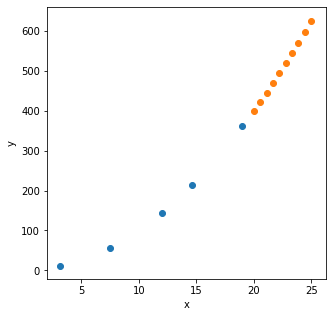

In [394]:
plt.figure(figsize=(5, 5))
plt.scatter(x, y)
plt.scatter(x_test, y_test)
plt.xlabel("x")
plt.ylabel("y")

## Polynomial Regression

In [526]:
def get_error(y_pred, y_true):
    d = y_pred - y_true
#     return np.mean((d**2)**(1/2))
    return (np.mean(d**2))**(1/2)

- Preparation

In [398]:
#--- parameter ---#
degree = 8 # degree of polynomial fuction, complexity of the model.
#-----------------#

# Define model
pf = PolynomialFeatures(degree=degree, include_bias=False)
model = LinearRegression()

- train/fit the model on the training dataset

In [314]:
x_ = pf.fit_transform(x)
model.fit(x_, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

- observe the error on the training set

In [327]:
x_ = pf.fit_transform(x)
y_pred = model.predict(x_)

In [328]:
get_error(y_pred, y)

2.429591421678415e-22

- observe the error on the test set

In [330]:
x_ = pf.fit_transform(x_test)
y_pred = model.predict(x_)

In [331]:
get_error(y_pred, y_test)

40054750.43972854

- the predicted fuction.

In [503]:
def f(x, model):
    coef = np.reshape(model.coef_.reshape(-1), (1, -1))
    a = np.tile(x, (1, coef.shape[1]))
    for i in range(coef.shape[1]):
        a[:, i] = a[:, i] ** (i+1)
    y = np.dot(a, coef.T)
    return y

In [320]:
data = []
line = np.reshape(np.linspace(0, x.max()+1, 100), (100, 1))
y_predict = f(line, model)
y_true = f_true(line)

- visualization of the predected and true function

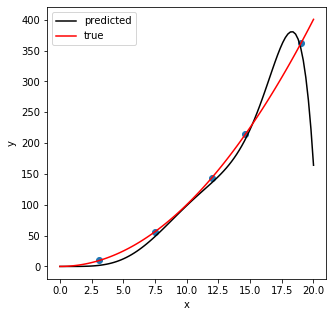

In [323]:
plt.figure(figsize=(5, 5))
plt.scatter(x, y)
# plt.scatter(x_test, y_test)
plt.plot(line, y_predict, c="black", label="predicted")
plt.plot(line, y_true, c="red", label="true")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()

## Functionize

In [660]:
def data_generator(num, test_num=10, alpha=0, x_min=0, x_max=20, add=5):
    np.random.seed(42)
    x = np.random.random((num, 1))*(x_max-x_min)-x_min
    x_test = np.reshape(np.linspace(x_max, x_max+add, test_num), (test_num,1)) # generate random point in range [0, -20]
    y = f_true(x)
    y_test = f_true(x_test)
    np.random.seed(42)
    y = y + np.random.randn(*x.shape)*alpha
    return x, y, x_test, y_test

In [337]:
def predict_polyreg(x, y, degree):
    pf = PolynomialFeatures(degree=degree, include_bias=False)
    model = LinearRegression()
    x_ = pf.fit_transform(x)
    model.fit(x_, y)
    return model, pf

In [342]:
def get_errors(pf, model, x, y, x_test, y_test):
    x_ = pf.fit_transform(x)
    y_pred = model.predict(x_)
    train_error = get_error(y_pred, y)
    x_ = pf.fit_transform(x_test)
    y_pred = model.predict(x_)
    test_error = get_error(y_pred, y_test)
    return train_error, test_error

# Underfitting
- lack of the complexity (too low capacity of the model)

# Overfitting
- the main purpose of machine learning is to predict data from only existing data (data you have).
- in other words, we have only the training data.
- it causes the model to have learned features from the training data that are specific to it.
- it is called **Overfitting** in this field, in Japanese we call it "過学習" and it is kind of "深読み" for our real world.


- There are two factors that lead to Overfitting.
    - lack of the number of training data
    - the complexity of the model is too high compared to the complexity of the training set.
        - \* "the complexity of the model" = "how smart the model is"
        
        
- I will explain three way to prevent it.
    - Prepare much training data as possible.
    - Prepare the model whose capacity fits the complexity of the data.
    - Employ Regularization

## Prepare Much Training Data as Possible

### lack of training data

In [333]:
training_num = 5
degree = 8

In [334]:
x, y, x_test, y_test = data_generator(training_num)

In [356]:
model, pf = predict_polyreg(x, y, degree)

In [345]:
train_error, test_error = get_errors(pf, model, x, y, x_test, y_test)
print(f"train error: {train_error}")
print(f"test error : {test_error}")

train error: 2.429591421678415e-22
test error : 40054750.43972854


In [346]:
data = []
line = np.reshape(np.linspace(0, x.max()+2, 100), (100, 1))
y_predict = f(line, model)
y_true = f_true(line)

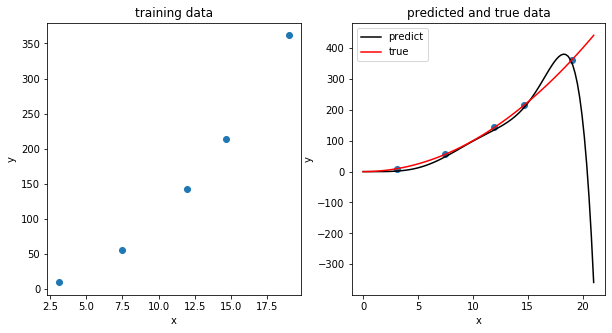

In [347]:
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 2, 1)
ax.scatter(x, y)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_title("training data")
ax = fig.add_subplot(1, 2, 2)
ax.scatter(x, y)
ax.plot(line, y_predict, c="black", label="predict")
ax.plot(line, y_true, c="red", label="true")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_title("predicted and true data")
plt.legend()

### Plentiful training data

In [357]:
training_num = 100
degree = 8

In [358]:
x, y, x_test, y_test = data_generator(training_num)

In [359]:
model, pf = predict_polyreg(x, y, degree)

In [361]:
train_error, test_error = get_errors(pf, model, x, y, x_test, y_test)
print(f"train error: {train_error}")
print(f"test error : {test_error}")

train error: 7.668270797484276e-13
test error : 1.3369408900167282e-11


In [362]:
data = []
line = np.reshape(np.linspace(0, x.max()+2, 100), (100, 1))
y_predict = f(line, model)
y_true = f_true(line)

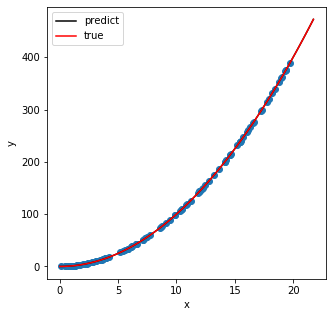

In [363]:
plt.figure(figsize=(5, 5))
plt.scatter(x, y)
plt.plot(line, y_predict, c="black", label="predict")
plt.plot(line, y_true, c="red", label="true")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()

## Prepare the model whose capacity fits the complexity of the data.

### the model with high capacity

In [737]:
training_num = 10000
degree = 15

In [738]:
x, y, x_test, y_test = data_generator(training_num)

In [739]:
model, pf = predict_polyreg(x, y, degree)

In [740]:
train_error, test_error = get_errors(pf, model, x, y, x_test, y_test)
print(f"train error: {train_error}")
print(f"test error : {test_error}")

train error: 3.427444108947902
test error : 200097.68596358525


In [741]:
data = []
line = np.reshape(np.linspace(0, x.max()+2, 100), (100, 1))
y_predict = f(line, model)
y_true = f_true(line)

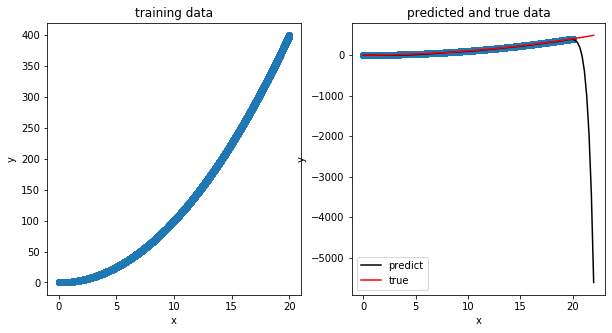

In [742]:
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 2, 1)
ax.scatter(x, y)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_title("training data")
ax = fig.add_subplot(1, 2, 2)
ax.scatter(x, y)
ax.plot(line, y_predict, c="black", label="predict")
ax.plot(line, y_true, c="red", label="true")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_title("predicted and true data")
plt.legend()

### the model with low capacity

In [744]:
training_num = 10000
degree = 5

In [745]:
x, y, x_test, y_test = data_generator(training_num)

In [746]:
model, pf = predict_polyreg(x, y, degree)

In [747]:
train_error, test_error = get_errors(pf, model, x, y, x_test, y_test)
print(f"train error: {train_error}")
print(f"test error : {test_error}")

train error: 1.5042344146390302e-10
test error : 6.264395805845841e-10


In [752]:
data = []
line = np.reshape(np.linspace(0, x.max()+2, 100), (100, 1))
y_predict = f(line, model)
y_true = f_true(line)

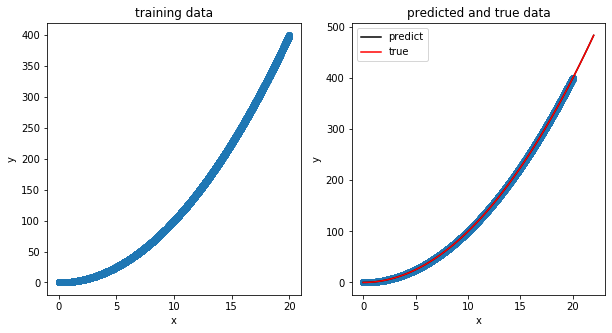

In [753]:
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 2, 1)
ax.scatter(x, y)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_title("training data")
ax = fig.add_subplot(1, 2, 2)
ax.scatter(x, y)
ax.plot(line, y_predict, c="black", label="predict")
ax.plot(line, y_true, c="red", label="true")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_title("predicted and true data")
plt.legend()

# Regularization

## Ridge Regression

In [690]:
training_num = 10000

In [691]:
x, y, x_test, y_test = data_generator(training_num)

In [731]:
degree = 13
alpha = 1

In [732]:
linear_model, linear_pf = predict_polyreg(x, y, degree)

In [733]:
pf = PolynomialFeatures(degree=degree, include_bias=False)
model = Ridge(alpha=alpha, random_state=42)
x_ = pf.fit_transform(x)
model.fit(x_, y)

Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=42, solver='auto', tol=0.001)

In [734]:
train_error, test_error = get_errors(linear_pf, linear_model, x, y, x_test, y_test)
print(f"Linear: train error: {train_error}")
print(f"Linear: test  error: {test_error}")
train_error, test_error = get_errors(pf, model, x, y, x_test, y_test)
print(f"Ridge : train error: {train_error}")
print(f"Ridge : test  error: {test_error}")

Linear: train error: 0.4811163256011891
Linear: test  error: 13341.028490773904
Ridge : train error: 0.653353488369182
Ridge : test  error: 218.26660018366138


In [735]:
data = []
line = np.reshape(np.linspace(0, x.max()+5, 100), (100, 1))
linear_predict = f(line, linear_model)
y_predict = f(line, model)
y_true = f_true(line)

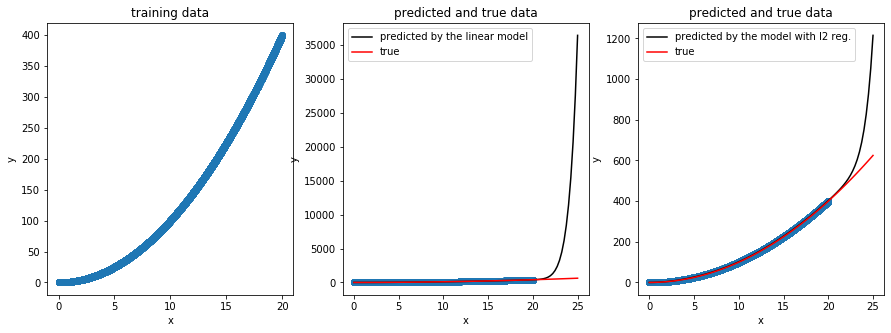

In [736]:
fig = plt.figure(figsize=(15, 5))
ax = fig.add_subplot(1, 3, 1)
ax.scatter(x, y)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_title("training data")
ax = fig.add_subplot(1, 3, 2)
ax.scatter(x, y)
ax.plot(line, linear_predict, c="black", label="predicted by the linear model")
ax.plot(line, y_true, c="red", label="true")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_title("predicted and true data")
plt.legend()
ax = fig.add_subplot(1, 3, 3)
ax.scatter(x, y)
ax.plot(line, y_predict, c="black", label="predicted by the model with l2 reg.")
ax.plot(line, y_true, c="red", label="true")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_title("predicted and true data")
plt.legend()

## Lasso Regression

In [661]:
training_num = 100

In [662]:
x, y, x_test, y_test = data_generator(training_num, add=8)

In [669]:
degree = 13
alpha = 10

In [670]:
linear_model, linear_pf = predict_polyreg(x, y, degree)

In [671]:
pf = PolynomialFeatures(degree=degree, include_bias=False)
model = Lasso(alpha=alpha, random_state=42)
x_ = pf.fit_transform(x)
model.fit(x_, y)

Lasso(alpha=10, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False,
      positive=False, precompute=False, random_state=42, selection='cyclic',
      tol=0.0001, warm_start=False)

In [672]:
train_error, test_error = get_errors(linear_pf, linear_model, x, y, x_test, y_test)
print(f"Linear: train error: {train_error}")
print(f"Linear: test  error: {test_error}")
train_error, test_error = get_errors(pf, model, x, y, x_test, y_test)
print(f"Lasso : train error: {train_error}")
print(f"Lasso : test  error: {test_error}")

Linear: train error: 0.4699732867682713
Linear: test  error: 291674.4475214252
Lasso : train error: 168.19553478116973
Lasso : test  error: 322.7869874552698


In [673]:
data = []
line = np.reshape(np.linspace(0, x.max()+5, 100), (100, 1))
linear_predict = f(line, linear_model)
y_predict = f(line, model)
y_true = f_true(line)

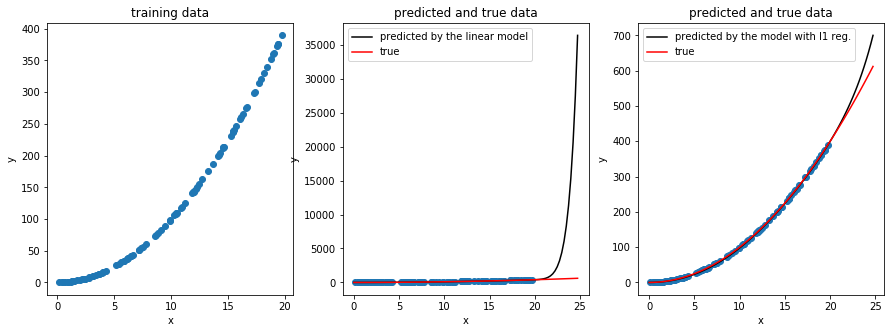

In [674]:
fig = plt.figure(figsize=(15, 5))
ax = fig.add_subplot(1, 3, 1)
ax.scatter(x, y)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_title("training data")
ax = fig.add_subplot(1, 3, 2)
ax.scatter(x, y)
ax.plot(line, linear_predict, c="black", label="predicted by the linear model")
ax.plot(line, y_true, c="red", label="true")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_title("predicted and true data")
plt.legend()
ax = fig.add_subplot(1, 3, 3)
ax.scatter(x, y)
ax.plot(line, y_predict, c="black", label="predicted by the model with l1 reg.")
ax.plot(line, y_true, c="red", label="true")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_title("predicted and true data")
plt.legend()